In [ ]:
import torch
from torchvision import datasets # for built-in datasets
from torchvision import transforms # for pre-processing like normalization
torch.manual_seed(2) # reproducibility

In [ ]:
train_dataset = datasets.MNIST(root='data/',
                              train=True,
                              transform=transforms.Compose([
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.1307,), (0.3081,))
                              ]),
                              download=True)

test_dataset = datasets.MNIST(root='data/',
                             train=False,
                             transform=transforms.Compose([
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.1307,), (0.3081,))
                              ]))

In [ ]:
batch_size = 10
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
lst = list(train_loader)
print(lst[0][0].shape, lst[0][1].shape)

torch.Size([10, 1, 28, 28]) torch.Size([10])


In [ ]:
input_size = 28*28
hidden_size = [512, 32]
output_size = 10

In [ ]:
from torch import nn
from torch.optim import SGD

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, hidden_size[0]),
    nn.ReLU(),
    nn.Linear(hidden_size[0], hidden_size[1]),
    nn.ReLU(),
    nn.Linear(hidden_size[1], output_size)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.001)

In [ ]:
epochs = 20

loss_vs_epochs = []
for e in range(epochs):
  epoch_loss = 0
  print("New Epoch")
  for images, labels in train_loader:
    images = images.view(images.shape[0], -1)

    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()
  print("Epoch:{}, Loss:{}".format(e, epoch_loss))
  loss_vs_epochs.append(epoch_loss)

New Epoch
Epoch:0, Loss:5775.554907806218
New Epoch
Epoch:1, Loss:2080.660278555937
New Epoch
Epoch:2, Loss:1703.892443511635
New Epoch
Epoch:3, Loss:1489.5545885292813
New Epoch
Epoch:4, Loss:1328.5037438338622
New Epoch
Epoch:5, Loss:1196.2094351113774
New Epoch
Epoch:6, Loss:1083.1645349978935
New Epoch
Epoch:7, Loss:986.0626399617177
New Epoch
Epoch:8, Loss:904.4690849343315
New Epoch
Epoch:9, Loss:833.3506997856312
New Epoch
Epoch:10, Loss:768.8178921436192
New Epoch
Epoch:11, Loss:714.4799660415156
New Epoch
Epoch:12, Loss:664.0559710080852
New Epoch
Epoch:13, Loss:620.2765810349956
New Epoch
Epoch:14, Loss:581.8345049371128
New Epoch
Epoch:15, Loss:545.2626039685565
New Epoch
Epoch:16, Loss:513.1334909127036
New Epoch
Epoch:17, Loss:483.16279223165475
New Epoch
Epoch:18, Loss:454.21095429209527
New Epoch
Epoch:19, Loss:428.76561909436714


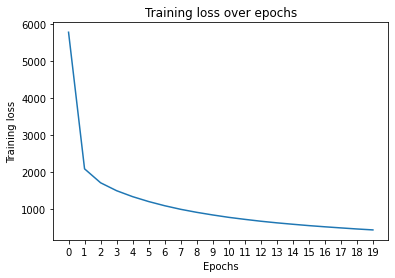

In [ ]:
import matplotlib.pyplot as plt

plt.clf()
plt.plot(loss_vs_epochs)
plt.xlabel("Epochs")
plt.ylabel("Training loss")
plt.title("Training loss over epochs")
epoch_label = [i for i in range(epochs)]
plt.xticks(epoch_label, epoch_label)
plt.show()

In [ ]:
num_correct = 0
with torch.no_grad():
  for images, labels in test_dataset:
    images = images.view(images.shape[0], -1)
    output = model(images)
    _, predicted = torch.max(output, 1)
    num_correct += torch.sum(predicted == labels)

print("Accuracy = {}". format(100 * num_correct / float(len(test_loader.dataset))))

Accuracy = 97.26000213623047
